In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
future_contract = symbols('NGF18')

In [3]:
future_contract.asset_name

'Natural Gas'

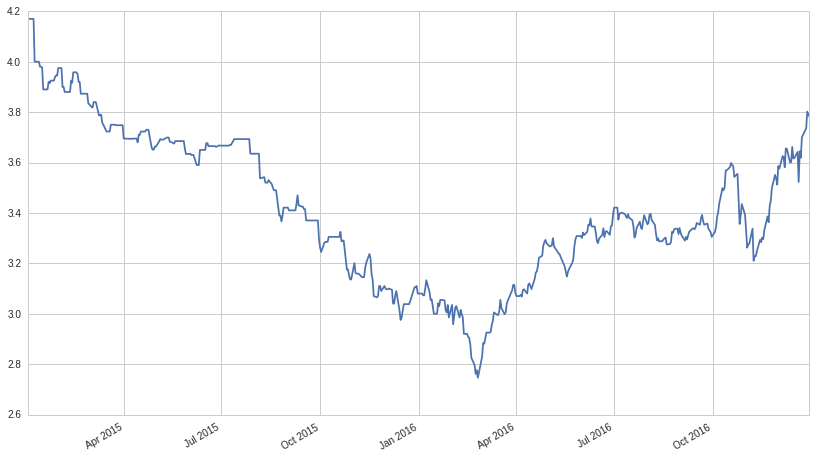

In [4]:
future_position_value = get_pricing(future_contract, start_date='2015-01-01', end_date='2017-01-01', fields='price')
future_position_value.name = future_position_value.name
future_position_value.plot()

In [5]:
from quantopian.research.experimental import history

In [6]:
ngf_18 = future_contract

ngf_18_data = history(ngf_18, fields=['price', 'open_price', 'high', 'low',
        'close_price', 'volume', 'contract'], frequency='daily', start='2017-06-01', end='2017-08-01')

In [7]:
ngf_18_data.head()

,price,open_price,high,low,close_price,volume,contract
2017-06-01 00:00:00+00:00,3.385,3.412,3.435,3.341,3.385,5497.0,Future(1061201801 [NGF18])
2017-06-02 00:00:00+00:00,3.353,3.386,3.386,3.336,3.353,2443.0,Future(1061201801 [NGF18])
2017-06-05 00:00:00+00:00,3.310,3.373,3.378,3.298,3.310,2457.0,Future(1061201801 [NGF18])
2017-06-06 00:00:00+00:00,3.366,3.318,3.371,3.307,3.366,2061.0,Future(1061201801 [NGF18])
2017-06-07 00:00:00+00:00,3.348,3.370,3.393,3.342,3.348,1834.0,Future(1061201801 [NGF18])


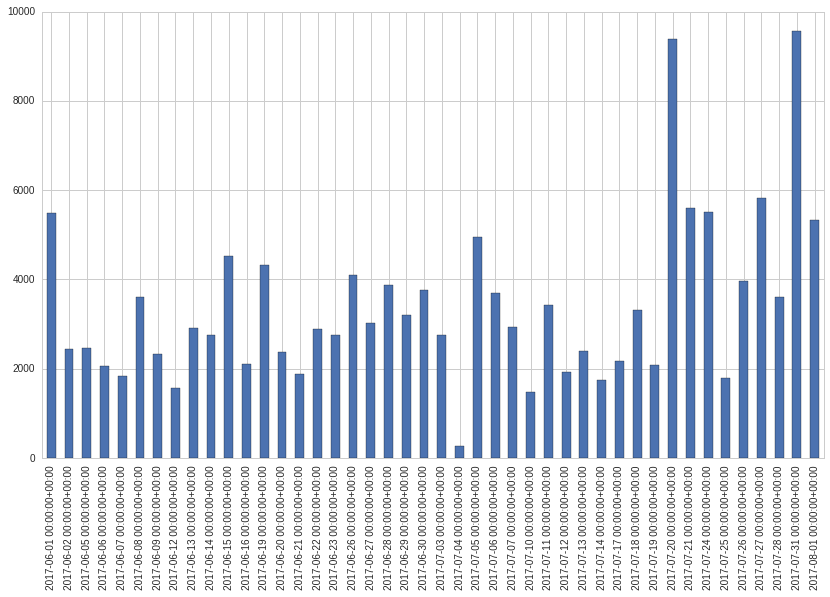

In [8]:
ngf_18_data['volume'].plot(kind='bar')

In [9]:
ng_contracts = symbols(['NGF17', 'NGG17', 'NGH17', 
                        'NGI17', 'NGJ17', 'NGK17'])

In [10]:
ng_consecutive_contract_volume = history(ng_contracts, fields='volume', 
                                         frequency='daily', start='2016-01-01', 
                                         end='2017-08-01')

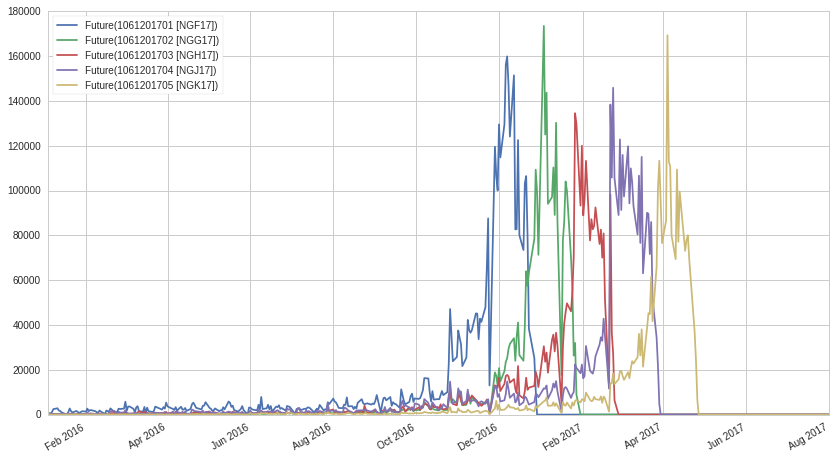

In [11]:
ng_consecutive_contract_volume.plot()

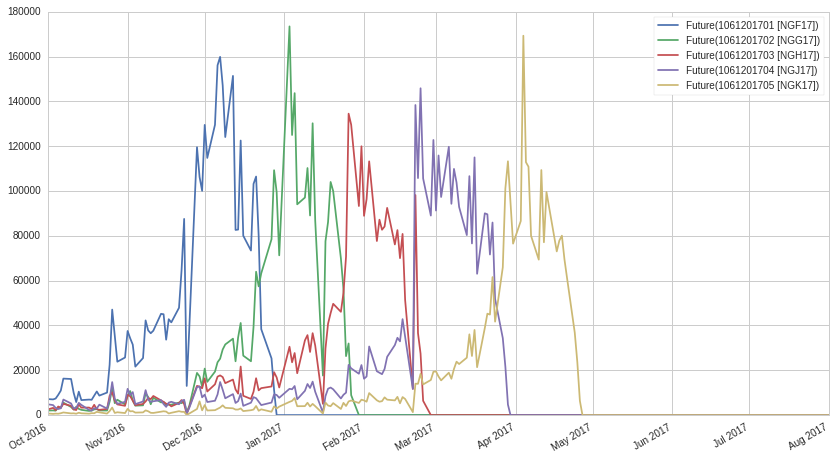

In [12]:
ng_consecutive_contract_volume.plot(xlim=['2016-10-01', '2017-08-01'])

In [13]:
from quantopian.research.experimental import continuous_future

In [14]:
continuous_ng = continuous_future('NG', offset=0, roll='volume', adjustment='mul')

In [15]:
continuous_ng

ContinuousFuture(94090707563773952, root_symbol='NG', offset=0, roll_style='volume', adjustment='mul')

In [16]:
ng_cont_active = history(continuous_ng, fields=['contract', 'price', 'volume'], 
                         frequency='daily', start='2016-10-01', end='2017-08-01')

In [17]:
ng_cont_active.head()

,price,volume,contract
2016-10-03 00:00:00+00:00,3.960,86282.0,Future(1061201611 [NGX16])
2016-10-04 00:00:00+00:00,4.051,90845.0,Future(1061201611 [NGX16])
2016-10-05 00:00:00+00:00,4.133,119522.0,Future(1061201611 [NGX16])
2016-10-06 00:00:00+00:00,4.139,135372.0,Future(1061201611 [NGX16])
2016-10-07 00:00:00+00:00,4.321,159697.0,Future(1061201611 [NGX16])


In [18]:
ng_cont_active.tail()

,price,volume,contract
2017-07-26 00:00:00+00:00,2.921,75030.0,Future(1061201709 [NGU17])
2017-07-27 00:00:00+00:00,2.958,136600.0,Future(1061201709 [NGU17])
2017-07-28 00:00:00+00:00,2.923,59646.0,Future(1061201709 [NGU17])
2017-07-31 00:00:00+00:00,2.810,132934.0,Future(1061201709 [NGU17])
2017-08-01 00:00:00+00:00,2.821,95926.0,Future(1061201709 [NGU17])


In [19]:
ng_cont_active['contract'].unique()

array([Future(1061201611 [NGX16]), Future(1061201612 [NGZ16]),
       Future(1061201701 [NGF17]), Future(1061201702 [NGG17]),
       Future(1061201703 [NGH17]), Future(1061201704 [NGJ17]),
       Future(1061201705 [NGK17]), Future(1061201706 [NGM17]),
       Future(1061201707 [NGN17]), Future(1061201708 [NGQ17]),
       Future(1061201709 [NGU17])], dtype=object)

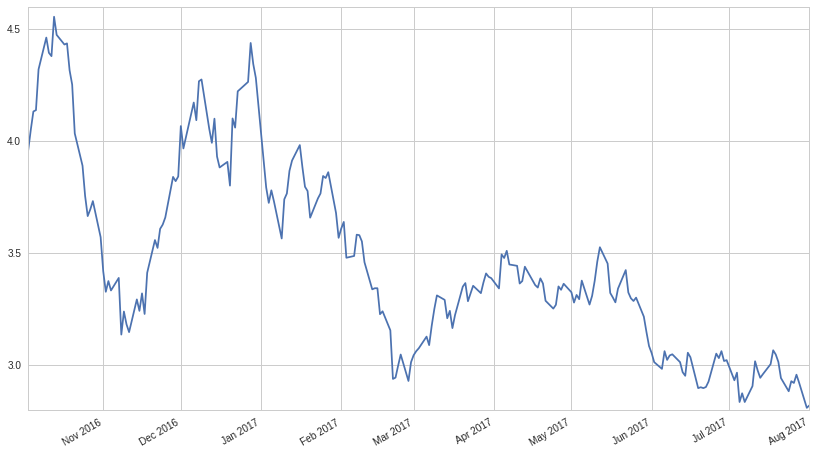

In [20]:
ng_cont_active['price'].plot()

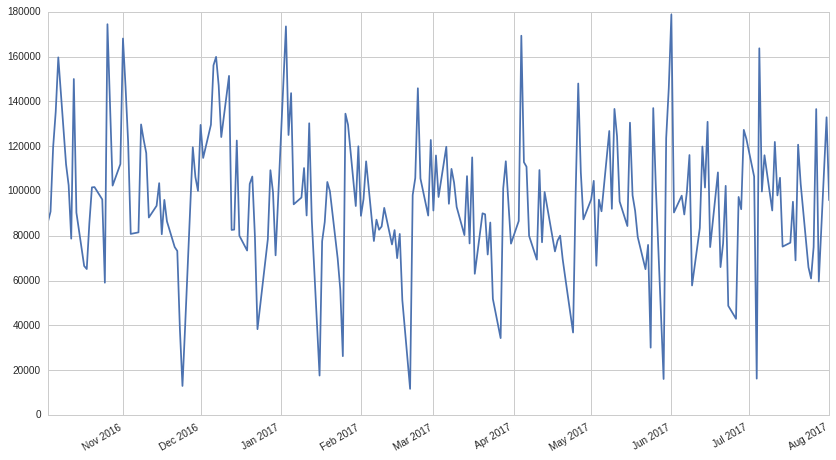

In [21]:
ng_cont_active['volume'].plot()

In [22]:
ng_consecutive_contract_volume = history(ng_contracts, fields='volume', 
                                         frequency='daily', start='2016-10-01', 
                                         end='2017-08-01')

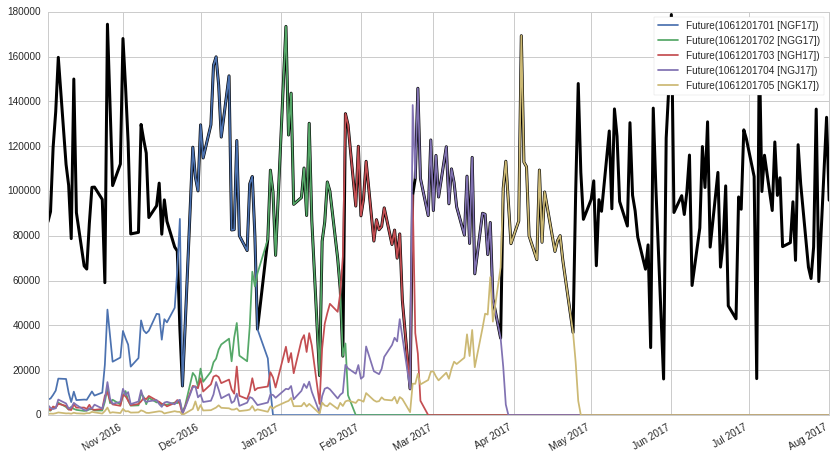

In [23]:
ax = ng_cont_active['volume'].plot(ls='-', c='k', lw=3)
ng_consecutive_contract_volume.plot(ax=ax)

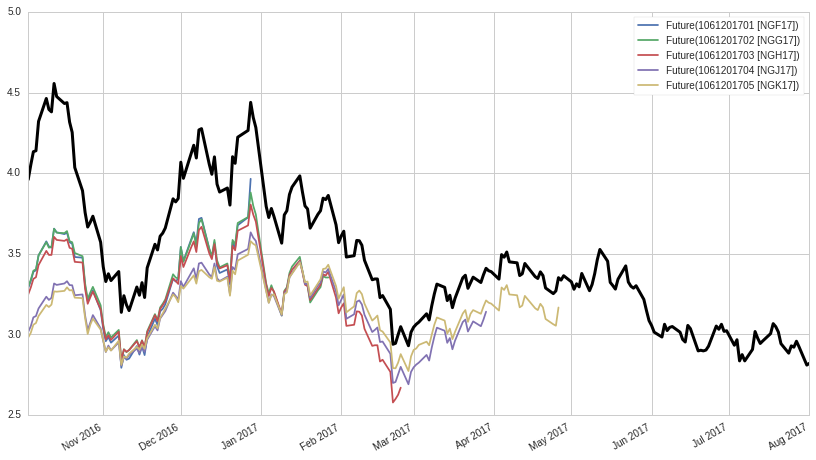

In [24]:
ng_consecutive_contract_price = history(ng_contracts, fields='price', 
                                         frequency='daily', start='2016-10-01', 
                                         end='2017-08-01')
ax = ng_cont_active['price'].plot(ls='-', c='k', lw=3)
ng_consecutive_contract_price.plot(ax=ax)

In [25]:
continuous_ng_unadjusted = continuous_future('NG', offset=0, roll='volume', adjustment=None)

In [26]:
ng_cont_unadjusted_active = history(continuous_ng_unadjusted, fields=['contract', 'price', 'volume'], 
                         frequency='daily', start='2016-10-01', end='2017-08-01')

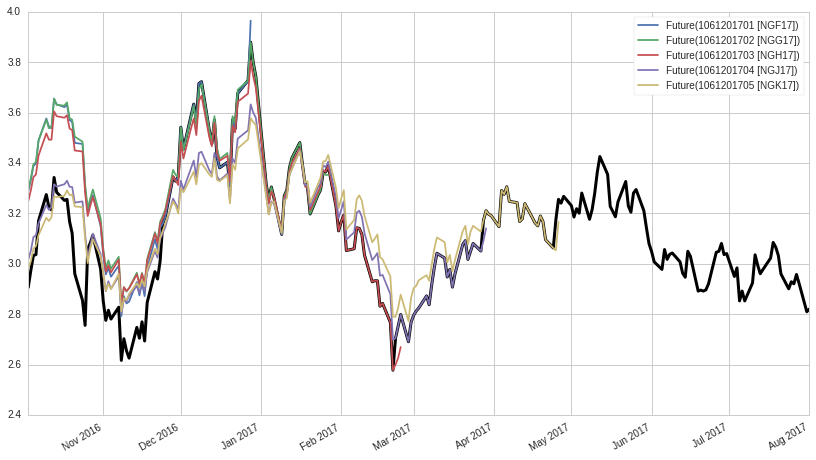

In [27]:
ng_consecutive_contract_price = history(ng_contracts, fields='price', 
                                         frequency='daily', start='2016-10-01', 
                                         end='2017-08-01')
ax = ng_cont_unadjusted_active['price'].plot(ls='-', c='k', lw=3)
ng_consecutive_contract_price.plot(ax=ax)